# Visualize PETAb Individual Experimental Data

This notebook visualizes the individual experimental data from measurements_alt.tsv, showing individual replicates along with mean and standard deviation for each observable (pSTAT1 and pSTAT3) across all experimental conditions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load PETAb Data

In [2]:
# Load PETAb files
conditions_df = pd.read_csv('../petab_files/conditions.tsv', sep='\t')
measurements_alt_df = pd.read_csv('../petab_files/measurements_alt.tsv', sep='\t')
observables_df = pd.read_csv('../petab_files/observables.tsv', sep='\t')

print(f"Conditions: {len(conditions_df)}")
print(f"Measurements: {len(measurements_alt_df)}")
print(f"Observables: {len(observables_df)}")

# Display conditions
print("\nExperimental Conditions:")
display(conditions_df)

# Show breakdown by observable and replicate
print("\nBreakdown by observable:")
for obs_id in measurements_alt_df['observableId'].unique():
    obs_data = measurements_alt_df[measurements_alt_df['observableId'] == obs_id]
    n_replicates = obs_data['replicateId'].nunique()
    print(f"  {obs_id}: {len(obs_data)} measurements across {n_replicates} experiments")
    
print("\nSample of data:")
display(measurements_alt_df.head(20))

Conditions: 6
Measurements: 467
Observables: 2

Experimental Conditions:


,conditionId,L1_0,L2_0
0,cond_il6_1,1.0,0.0
1,cond_il10_1,0.0,1.0
2,cond_il6_10,10.0,0.0
3,cond_il6_10_il10_10,10.0,10.0
4,cond_il10_10,0.0,10.0
5,cond_il6_1_il10_1,1.0,1.0



Breakdown by observable:
  obs_total_pS1: 191 measurements across 5 experiments
  obs_total_pS3: 276 measurements across 9 experiments

Sample of data:


,observableId,simulationConditionId,time,measurement,noiseParameters,replicateId
0,obs_total_pS1,cond_il10_1,0,0.000000,sigma_pSTAT1,Exp1
1,obs_total_pS1,cond_il10_1,0,0.000000,sigma_pSTAT1,Exp2
2,obs_total_pS1,cond_il10_1,0,0.000000,sigma_pSTAT1,Exp3
3,obs_total_pS1,cond_il10_1,0,0.000000,sigma_pSTAT1,Exp4
4,obs_total_pS1,cond_il10_1,0,0.000000,sigma_pSTAT1,Exp5
5,obs_total_pS1,cond_il10_1,10,0.205571,sigma_pSTAT1,Exp1
6,obs_total_pS1,cond_il10_1,10,0.021172,sigma_pSTAT1,Exp3
7,obs_total_pS1,cond_il10_1,10,0.000000,sigma_pSTAT1,Exp4
8,obs_total_pS1,cond_il10_1,10,0.141222,sigma_pSTAT1,Exp5
9,obs_total_pS1,cond_il10_1,20,0.226028,sigma_pSTAT1,Exp1


## Compute Statistics

Calculate mean and standard deviation for each observable at each timepoint and condition.

In [3]:
# Group by condition, observable, and time to compute statistics
stats_df = measurements_alt_df.groupby(['simulationConditionId', 'observableId', 'time'])['measurement'].agg(
    mean='mean',
    std='std',
    count='count'
).reset_index()

print(f"\nStatistics computed for {len(stats_df)} unique (condition, observable, time) combinations")
print(f"\nSample statistics:")
display(stats_df.head(10))


Statistics computed for 84 unique (condition, observable, time) combinations

Sample statistics:


,simulationConditionId,observableId,time,mean,std,count
0,cond_il10_1,obs_total_pS1,0,0.000000,0.000000,5
1,cond_il10_1,obs_total_pS1,10,0.091991,0.097983,4
2,cond_il10_1,obs_total_pS1,20,0.096957,0.083552,5
3,cond_il10_1,obs_total_pS1,30,0.079644,0.053376,4
4,cond_il10_1,obs_total_pS1,45,0.139766,0.134463,5
5,cond_il10_1,obs_total_pS1,60,0.102341,0.107121,5
6,cond_il10_1,obs_total_pS1,90,0.083567,0.087550,5
7,cond_il10_1,obs_total_pS3,0,0.000000,0.000000,9
8,cond_il10_1,obs_total_pS3,10,0.335596,0.228488,9
9,cond_il10_1,obs_total_pS3,20,0.573334,0.229231,9


## Plot Observable Data

Six panels showing measurements for each experimental condition, for both pSTAT1 and pSTAT3.

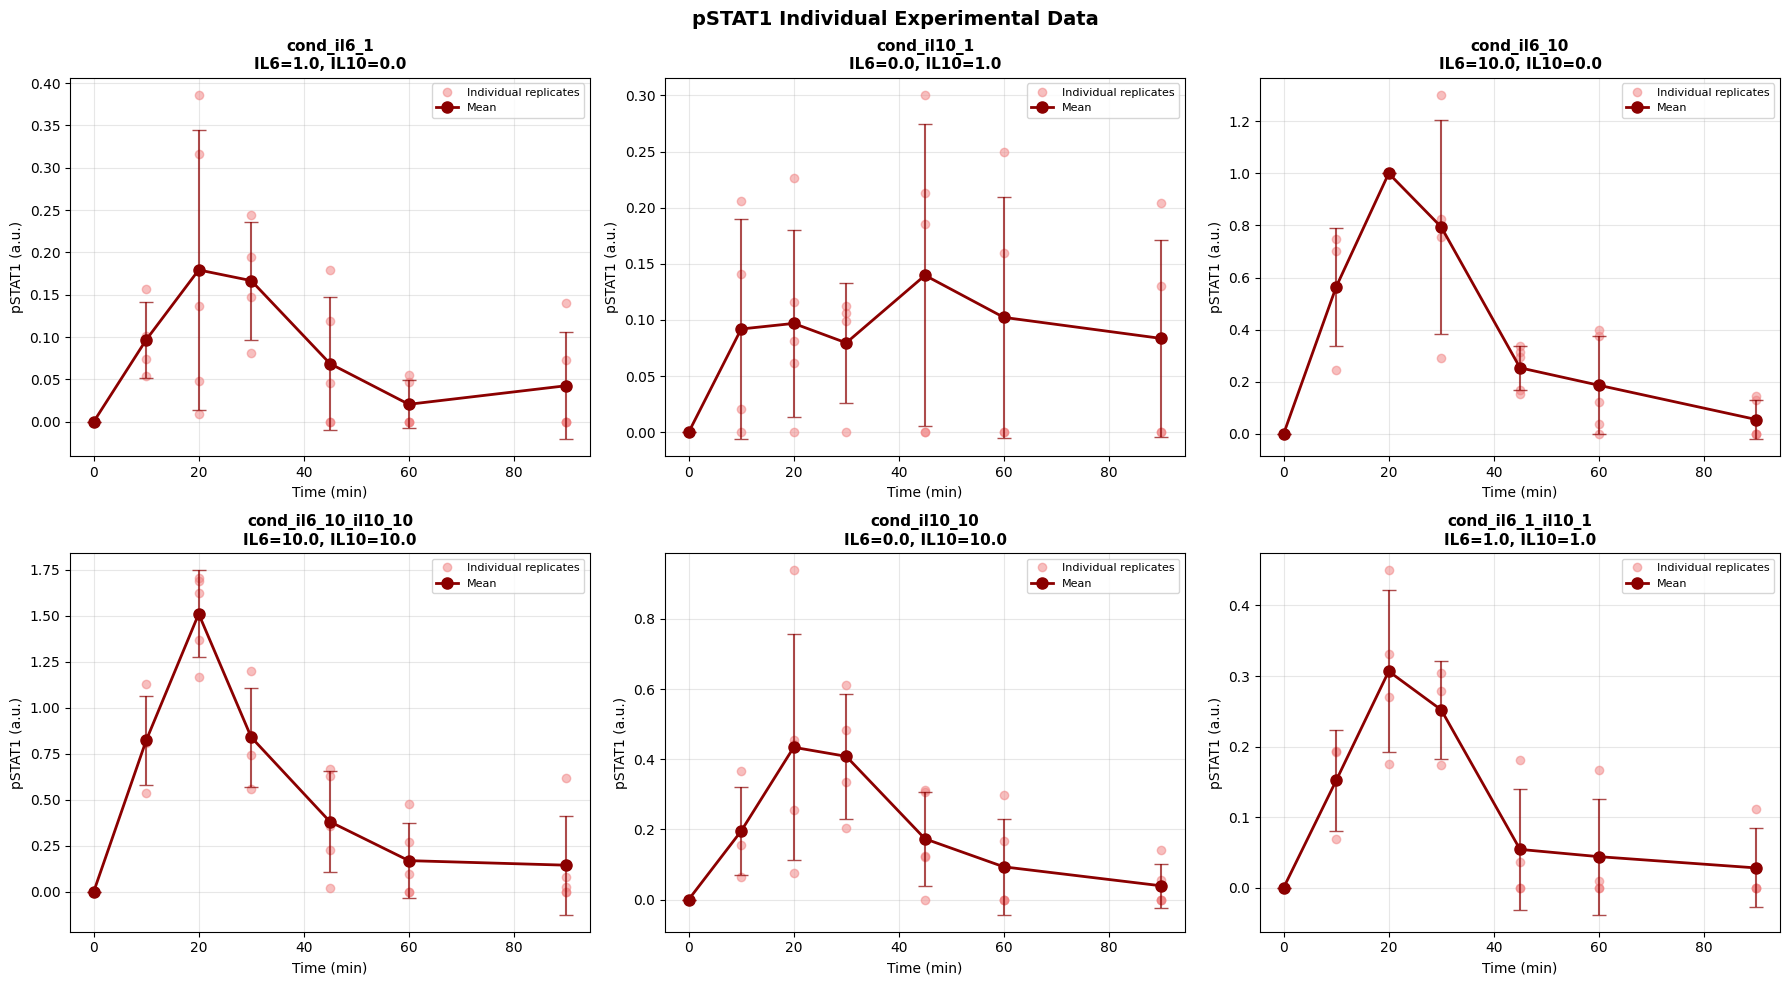


pSTAT1 Summary:
  Total measurements: 191
  Number of replicates: 5
  Mean of means: 0.24
  Range: [0.00, 1.51]
  Average std deviation: 0.12


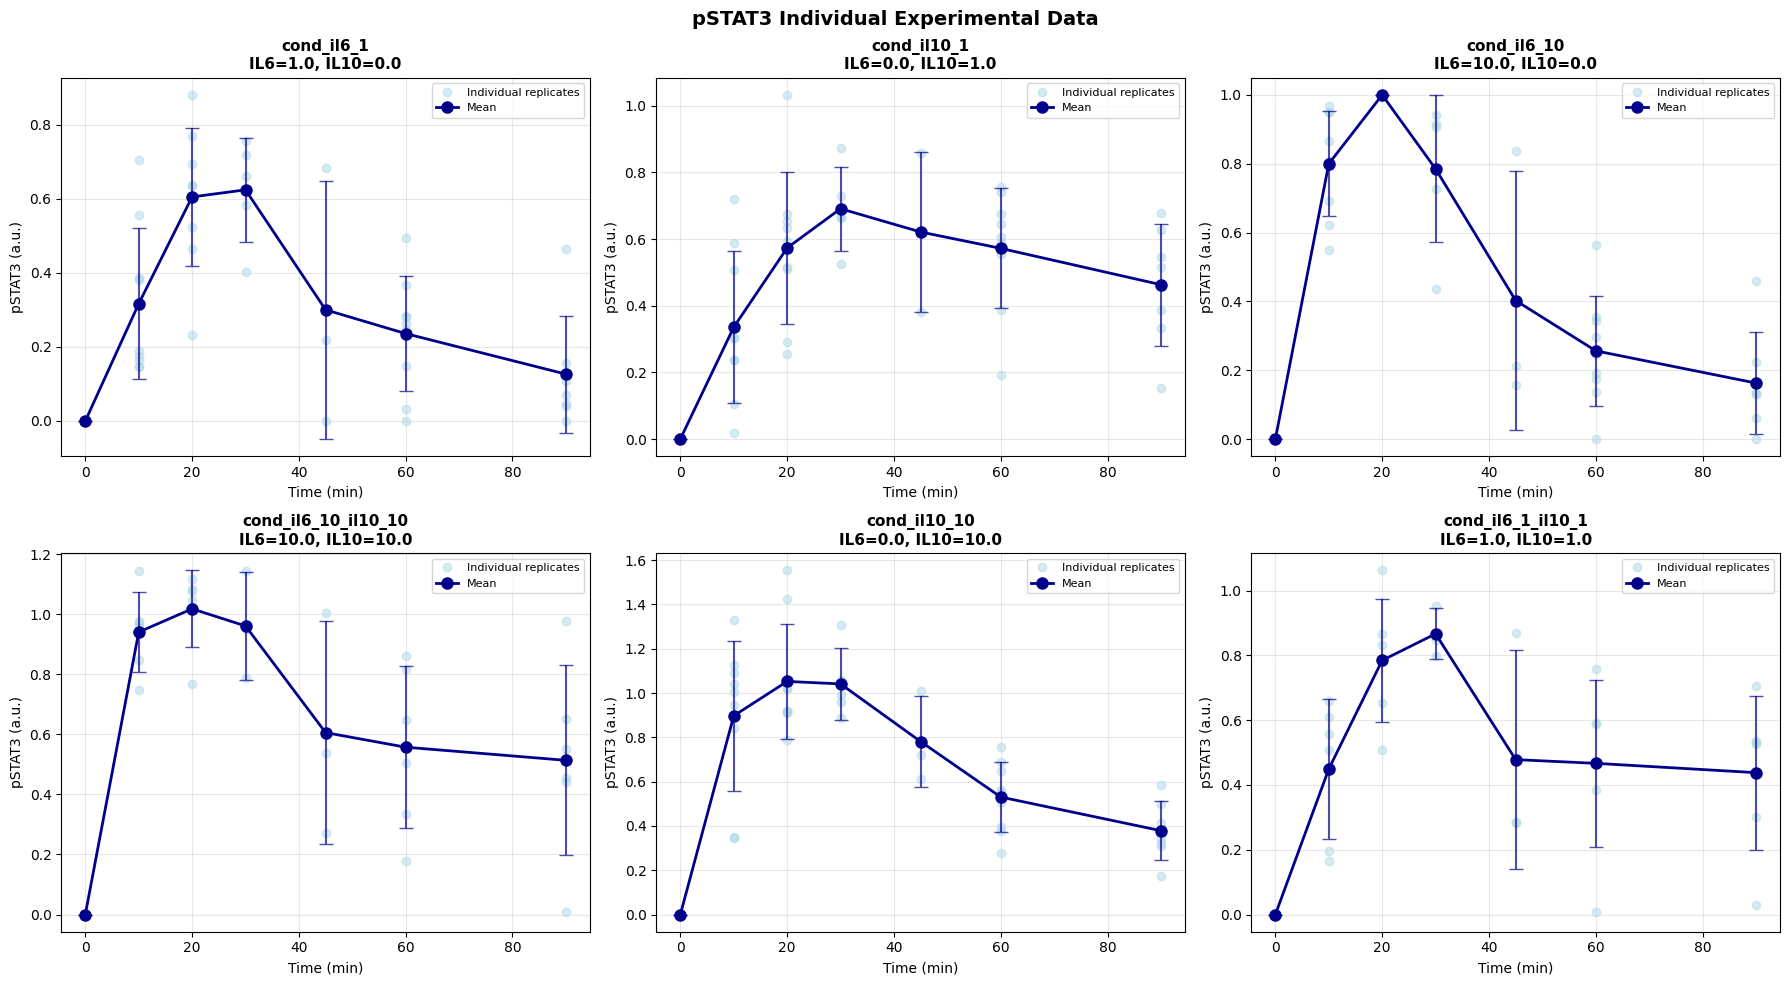


pSTAT3 Summary:
  Total measurements: 276
  Number of replicates: 9
  Mean of means: 0.52
  Range: [0.00, 1.05]
  Average std deviation: 0.18


In [4]:
# Define observables and their plotting properties
observables = [
    {'id': 'obs_total_pS1', 'name': 'pSTAT1', 'light_color': 'lightcoral', 'dark_color': 'darkred'},
    {'id': 'obs_total_pS3', 'name': 'pSTAT3', 'light_color': 'lightblue', 'dark_color': 'darkblue'}
]

# Plot each observable
for obs in observables:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    observable_id = obs['id']
    observable_name = obs['name']
    
    for idx, cond_id in enumerate(conditions_df['conditionId']):
        ax = axes[idx]
        
        # Get condition info
        cond_row = conditions_df[conditions_df['conditionId'] == cond_id].iloc[0]
        
        # Get all individual measurements for this condition and observable
        cond_data = measurements_alt_df[
            (measurements_alt_df['simulationConditionId'] == cond_id) &
            (measurements_alt_df['observableId'] == observable_id)
        ]
        
        # Get statistics for this condition and observable
        cond_stats = stats_df[
            (stats_df['simulationConditionId'] == cond_id) &
            (stats_df['observableId'] == observable_id)
        ]
        
        # Plot individual data points (replicates)
        ax.plot(cond_data['time'], cond_data['measurement'],
               'o', color=obs['light_color'], markersize=6, alpha=0.5, label='Individual replicates')
        
        # Plot mean
        ax.plot(cond_stats['time'], cond_stats['mean'],
               'o-', color=obs['dark_color'], markersize=8, linewidth=2, label='Mean')
        
        # Plot error bars (standard deviation)
        ax.errorbar(cond_stats['time'], cond_stats['mean'], yerr=cond_stats['std'],
                   fmt='none', ecolor=obs['dark_color'], capsize=5, linewidth=1.5, alpha=0.7)
        
        ax.set_title(f"{cond_id}\nIL6={cond_row['L1_0']}, IL10={cond_row['L2_0']}",
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Time (min)', fontsize=10)
        ax.set_ylabel(f'{observable_name} (a.u.)', fontsize=10)
        ax.legend(fontsize=8, loc='best')
        ax.grid(True, alpha=0.3)
    
    plt.suptitle(f'{observable_name} Individual Experimental Data', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{observable_name} Summary:")
    obs_stats = stats_df[stats_df['observableId'] == observable_id]
    obs_data = measurements_alt_df[measurements_alt_df['observableId'] == observable_id]
    print(f"  Total measurements: {len(obs_data)}")
    print(f"  Number of replicates: {obs_data['replicateId'].nunique()}")
    print(f"  Mean of means: {obs_stats['mean'].mean():.2f}")
    print(f"  Range: [{obs_stats['mean'].min():.2f}, {obs_stats['mean'].max():.2f}]")
    print(f"  Average std deviation: {obs_stats['std'].mean():.2f}")

## Combined Summary Statistics

In [5]:
# Create summary table by condition
print("\nSummary by Condition:")
print("=" * 80)

for cond_id in conditions_df['conditionId']:
    cond_row = conditions_df[conditions_df['conditionId'] == cond_id].iloc[0]
    
    # pSTAT1 stats
    pS1_cond_stats = stats_df[
        (stats_df['simulationConditionId'] == cond_id) &
        (stats_df['observableId'] == 'obs_total_pS1')
    ]
    
    pS1_cond_data = measurements_alt_df[
        (measurements_alt_df['simulationConditionId'] == cond_id) &
        (measurements_alt_df['observableId'] == 'obs_total_pS1')
    ]
    
    # pSTAT3 stats
    pS3_cond_stats = stats_df[
        (stats_df['simulationConditionId'] == cond_id) &
        (stats_df['observableId'] == 'obs_total_pS3')
    ]
    
    pS3_cond_data = measurements_alt_df[
        (measurements_alt_df['simulationConditionId'] == cond_id) &
        (measurements_alt_df['observableId'] == 'obs_total_pS3')
    ]
    
    print(f"\n{cond_id}: IL6={cond_row['L1_0']}, IL10={cond_row['L2_0']}")
    
    if len(pS1_cond_stats) > 0:
        n_pS1_reps = pS1_cond_data['replicateId'].nunique()
        print(f"  pSTAT1: mean={pS1_cond_stats['mean'].mean():.2f}, std={pS1_cond_stats['std'].mean():.2f}, n_replicates={n_pS1_reps}")
    else:
        print(f"  pSTAT1: No data")
    
    if len(pS3_cond_stats) > 0:
        n_pS3_reps = pS3_cond_data['replicateId'].nunique()
        print(f"  pSTAT3: mean={pS3_cond_stats['mean'].mean():.2f}, std={pS3_cond_stats['std'].mean():.2f}, n_replicates={n_pS3_reps}")
    else:
        print(f"  pSTAT3: No data")

print("\n" + "=" * 80)


Summary by Condition:

cond_il6_1: IL6=1.0, IL10=0.0
  pSTAT1: mean=0.08, std=0.06, n_replicates=5
  pSTAT3: mean=0.32, std=0.17, n_replicates=9

cond_il10_1: IL6=0.0, IL10=1.0
  pSTAT1: mean=0.08, std=0.08, n_replicates=5
  pSTAT3: mean=0.47, std=0.17, n_replicates=9

cond_il6_10: IL6=10.0, IL10=0.0
  pSTAT1: mean=0.41, std=0.14, n_replicates=5
  pSTAT3: mean=0.49, std=0.15, n_replicates=9

cond_il6_10_il10_10: IL6=10.0, IL10=10.0
  pSTAT1: mean=0.55, std=0.21, n_replicates=5
  pSTAT3: mean=0.66, std=0.20, n_replicates=6

cond_il10_10: IL6=0.0, IL10=10.0
  pSTAT1: mean=0.19, std=0.14, n_replicates=5
  pSTAT3: mean=0.67, std=0.18, n_replicates=9

cond_il6_1_il10_1: IL6=1.0, IL10=1.0
  pSTAT1: mean=0.12, std=0.07, n_replicates=4
  pSTAT3: mean=0.50, std=0.19, n_replicates=6



## Verify Normalization

Check that the normalization condition (IL6=10, IL10=0 at t=20) equals 1.0 for each replicate.

In [6]:
# Find normalization condition
norm_cond = conditions_df[
    (conditions_df['L1_0'] == 10.0) &
    (conditions_df['L2_0'] == 0.0)
]

if len(norm_cond) > 0:
    norm_cond_id = norm_cond.iloc[0]['conditionId']
    
    print(f"Normalization condition: {norm_cond_id} (IL6=10.0, IL10=0.0)")
    print("\nVerifying normalization at t=20:")
    print("=" * 80)
    
    for obs_id, obs_name in [('obs_total_pS1', 'pSTAT1'), ('obs_total_pS3', 'pSTAT3')]:
        norm_data = measurements_alt_df[
            (measurements_alt_df['simulationConditionId'] == norm_cond_id) &
            (measurements_alt_df['observableId'] == obs_id) &
            (measurements_alt_df['time'] == 20.0)
        ]
        
        print(f"\n{obs_name}:")
        for _, row in norm_data.iterrows():
            print(f"  {row['replicateId']}: {row['measurement']:.6f}")
else:
    print("Warning: Normalization condition (IL6=10, IL10=0) not found in conditions")

Normalization condition: cond_il6_10 (IL6=10.0, IL10=0.0)

Verifying normalization at t=20:

pSTAT1:
  Exp1: 1.000000
  Exp2: 1.000000
  Exp3: 1.000000
  Exp4: 1.000000
  Exp5: 1.000000

pSTAT3:
  Exp1: 1.000000
  Exp2: 1.000000
  Exp3: 1.000000
  Exp4: 1.000000
  Exp5: 1.000000
  Exp6: 1.000000
  Exp7: 1.000000
  Exp8: 1.000000
  Exp9: 1.000000


## Compare with Original Measurements

Compare the mean values computed from measurements_alt.tsv with the values in measurements.tsv to verify consistency.

In [7]:
# Load original measurements file
measurements_orig_df = pd.read_csv('../petab_files/measurements.tsv', sep='\t')

print(f"Original measurements file: {len(measurements_orig_df)} measurements")
print(f"\nSample of original measurements:")
display(measurements_orig_df.head(10))

# Merge the computed means with original measurements for comparison
comparison_df = stats_df.merge(
    measurements_orig_df,
    on=['simulationConditionId', 'observableId', 'time'],
    suffixes=('_computed', '_original')
)

# Calculate differences
comparison_df['difference'] = comparison_df['mean'] - comparison_df['measurement']
comparison_df['percent_diff'] = 100 * comparison_df['difference'] / comparison_df['measurement']

print(f"\n{'='*100}")
print(f"Comparison of computed means vs. original measurements")
print(f"{'='*100}")
print(f"\nNumber of matched data points: {len(comparison_df)}")
print(f"\nDifference statistics:")
print(f"  Mean absolute difference: {comparison_df['difference'].abs().mean():.6f}")
print(f"  Max absolute difference: {comparison_df['difference'].abs().max():.6f}")
print(f"  Mean percent difference: {comparison_df['percent_diff'].abs().mean():.2f}%")
print(f"  Max percent difference: {comparison_df['percent_diff'].abs().max():.2f}%")

# Show detailed comparison table
print(f"\nDetailed comparison (all data):")
display(comparison_df[[
    'simulationConditionId', 'observableId', 'time', 
    'mean', 'measurement', 'difference', 'percent_diff', 'count'
]])

# Check if any differences are significant
significant_diffs = comparison_df[comparison_df['difference'].abs() > 0.01]
if len(significant_diffs) > 0:
    print(f"\n{'='*100}")
    print(f"WARNING: Found {len(significant_diffs)} data points with |difference| > 0.01:")
    print(f"{'='*100}")
    display(significant_diffs[[
        'simulationConditionId', 'observableId', 'time', 
        'mean', 'measurement', 'difference', 'percent_diff'
    ]])
else:
    print(f"\n{'='*100}")
    print(f"✓ All differences are < 0.01 - computed means match original measurements well!")
    print(f"{'='*100}")

Original measurements file: 84 measurements

Sample of original measurements:


,observableId,simulationConditionId,time,measurement,noiseParameters
0,obs_total_pS1,cond_il10_1,0.0,0.000000,sigma_pSTAT1
1,obs_total_pS1,cond_il10_1,10.0,0.091991,sigma_pSTAT1
2,obs_total_pS1,cond_il10_1,20.0,0.096957,sigma_pSTAT1
3,obs_total_pS1,cond_il10_1,30.0,0.079644,sigma_pSTAT1
4,obs_total_pS1,cond_il10_1,45.0,0.139766,sigma_pSTAT1
5,obs_total_pS1,cond_il10_1,60.0,0.102341,sigma_pSTAT1
6,obs_total_pS1,cond_il10_1,90.0,0.083567,sigma_pSTAT1
7,obs_total_pS3,cond_il10_1,0.0,0.000000,sigma_pSTAT3
8,obs_total_pS3,cond_il10_1,10.0,0.335596,sigma_pSTAT3
9,obs_total_pS3,cond_il10_1,20.0,0.573334,sigma_pSTAT3



Comparison of computed means vs. original measurements

Number of matched data points: 84

Difference statistics:
  Mean absolute difference: 0.000000
  Max absolute difference: 0.000000
  Mean percent difference: 0.00%
  Max percent difference: 0.00%

Detailed comparison (all data):


,simulationConditionId,observableId,time,mean,measurement,difference,percent_diff,count
0,cond_il10_1,obs_total_pS1,0,0.000000,0.000000,0.000000e+00,NaN,5
1,cond_il10_1,obs_total_pS1,10,0.091991,0.091991,2.775558e-17,3.017201e-14,4
2,cond_il10_1,obs_total_pS1,20,0.096957,0.096957,1.387779e-17,1.431328e-14,5
3,cond_il10_1,obs_total_pS1,30,0.079644,0.079644,2.775558e-17,3.484952e-14,4
4,cond_il10_1,obs_total_pS1,45,0.139766,0.139766,8.326673e-17,5.957599e-14,5
...,...,...,...,...,...,...,...,...
79,cond_il6_1_il10_1,obs_total_pS3,20,0.784774,0.784774,0.000000e+00,0.000000e+00,6
80,cond_il6_1_il10_1,obs_total_pS3,30,0.866608,0.866608,0.000000e+00,0.000000e+00,3
81,cond_il6_1_il10_1,obs_total_pS3,45,0.478239,0.478239,0.000000e+00,0.000000e+00,3
82,cond_il6_1_il10_1,obs_total_pS3,60,0.466792,0.466792,5.551115e-17,1.189205e-14,6



✓ All differences are < 0.01 - computed means match original measurements well!
